In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [97]:
def get_auc_mae(csv_saving_path):
    this_csv_to_plot = pd.read_csv(csv_saving_path)
    #print(this_csv_to_plot.keys)
    mae_list = [this_csv_to_plot['mae'][0]]
    auc_list = [this_csv_to_plot['auc'][0]]
    count = 1
    while count < 10:
        this_mae_name = 'mae.'+str(count)
        this_auc_name = 'auc.'+str(count)
        mae_list.append(this_csv_to_plot[this_mae_name][0])
        auc_list.append(this_csv_to_plot[this_auc_name][0])
        count+=1

    return(np.mean(auc_list),np.mean(mae_list))  

In [98]:
def get_mean_svd(csv_saving_path,csv_result_path):
    this_csv_to_plot = pd.read_csv(csv_saving_path)
    this_csv_to_plot.keys
    mae_list = [this_csv_to_plot['mae'][0]]
    auc_list = [this_csv_to_plot['auc'][0]]
    bias_list = [this_csv_to_plot['bias'][0]]
    tss_list = [this_csv_to_plot['tss'][0]]
    threshold_list = [this_csv_to_plot['tss_threshold'][0]]
    count = 1
    while count < 10:
        this_mae_name = 'mae.'+str(count)
        this_auc_name = 'auc.'+str(count)
        this_bias_name = 'bias.'+str(count)
        this_tss_name = 'tss.'+str(count)
        this_threshold_name = 'tss_threshold.'+str(count)
        mae_list.append(this_csv_to_plot[this_mae_name][0])
        auc_list.append(this_csv_to_plot[this_auc_name][0])
        bias_list.append(this_csv_to_plot[this_bias_name][0])
        tss_list.append(this_csv_to_plot[this_tss_name][0])
        threshold_list.append(this_csv_to_plot[this_threshold_name][0])
        count+=1

    this_df = pd.DataFrame({'auc_mean': [np.mean(auc_list)], 'auc_std': [np.std(auc_list)],
                            'mae_mean': [np.mean(mae_list)], 'mae_std': [np.std(mae_list)],
                            'bias_mean': [np.mean(bias_list)], 'bias_std': [np.std(bias_list)],
                            'tss_mean': [np.mean(tss_list)], 'tss_std': [np.std(tss_list)],
                            'tss_threshold_mean': [np.mean(threshold_list)], 'tss_threshold_std': [np.std(threshold_list)],})
    this_df.to_csv(csv_result_path)

In [7]:
#auc,mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_process/San/evaluate/cv_metric_results.csv")
get_mean_svd(csv_saving_path="/Users/liting/Documents/GitHub/r_chagasM/output/kfold_process/San/evaluate/cv_metric_results.csv",
             csv_result_path="/Users/liting/Documents/GitHub/r_chagasM/output/kfold_process/San/evaluate/cv_metric_mean_std_results.csv")

In [23]:
pca_grid_auc,pca_grid_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_process/San/evaluate/cv_metric_results.csv")


<bound method NDFrame.keys of    Unnamed: 0      mae       tss      bias       auc  tss_threshold     mae.1  \
0           1  0.07802  0.836333 -0.034998  0.964117       0.209544  0.072467   

      tss.1    bias.1     auc.1  ...     mae.8     tss.8   bias.8     auc.8  \
0  0.895871 -0.032616  0.970532  ...  0.065683  0.906333 -0.03012  0.977433   

   tss_threshold.8     mae.9     tss.9    bias.9     auc.9  tss_threshold.9  
0         0.219833  0.075266  0.883607 -0.039992  0.974672          0.18036  

[1 rows x 51 columns]>


In [23]:
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"
this_bug = "Rec"

In [3]:
def generate_result_csv(output_dir,this_bug):
    get_mean_svd(csv_saving_path=output_dir+"kfold_process/"+this_bug+"/evaluate/cv_metric_results.csv",
             csv_result_path=output_dir+"kfold_process/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")
    get_mean_svd(csv_saving_path=output_dir+"kfold_buffer_process/"+this_bug+"/evaluate/cv_metric_results.csv",
                csv_result_path=output_dir+"kfold_buffer_process/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")

    get_mean_svd(csv_saving_path=output_dir+"kfold_grid_process/"+this_bug+"/evaluate/cv_metric_results.csv",
                csv_result_path=output_dir+"kfold_grid_process/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")

    get_mean_svd(csv_saving_path=output_dir+"kfold_grid_buffer_process/"+this_bug+"/evaluate/cv_metric_results.csv",
                csv_result_path=output_dir+"kfold_grid_buffer_process/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")

    get_mean_svd(csv_saving_path=output_dir+"kfold/"+this_bug+"/evaluate/cv_metric_results.csv",
                csv_result_path=output_dir+"kfold/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")
    get_mean_svd(csv_saving_path=output_dir+"kfold_buffer/"+this_bug+"/evaluate/cv_metric_results.csv",
                csv_result_path=output_dir+"kfold_buffer/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")

    get_mean_svd(csv_saving_path=output_dir+"kfold_grid/"+this_bug+"/evaluate/cv_metric_results.csv",
                csv_result_path=output_dir+"kfold_grid/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")
    get_mean_svd(csv_saving_path=output_dir+"kfold_grid_buffer/"+this_bug+"/evaluate/cv_metric_results.csv",
                csv_result_path=output_dir+"kfold_grid_buffer/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")



In [15]:
def generate_auc_mae_graph(output_dir,this_bug,bug_full_name):
    plt.figure(figsize=(5,5))

    pca_grid_auc,pca_grid_mae = get_auc_mae(output_dir+"/kfold_grid_process/"+this_bug+"/evaluate/cv_metric_results.csv")
    plt.scatter(pca_grid_mae, pca_grid_auc,label="pca_grid",marker='.')
    pca_grid_buffer_auc,pca_grid_buffer_mae = get_auc_mae(output_dir+"/kfold_grid_buffer_process/"+this_bug+"/evaluate/cv_metric_results.csv")
    plt.scatter(pca_grid_buffer_mae, pca_grid_buffer_auc,label="pca_grid_buffer",marker="*")

    pixel_auc,pixel_mae = get_auc_mae(output_dir+"/kfold/San/evaluate/cv_metric_results.csv")
    plt.scatter(pixel_mae,pixel_auc,label="pixel",marker='x')
    pixel_buffer_auc,pixel_buffer_mae = get_auc_mae(output_dir+"/kfold_buffer/"+this_bug+"/evaluate/cv_metric_results.csv")
    plt.scatter(pixel_buffer_mae,pixel_buffer_auc,label="pixel_buffer",marker="X")

    grid_auc,grid_mae = get_auc_mae(output_dir+"/kfold_grid/"+this_bug+"/evaluate/cv_metric_results.csv")
    plt.scatter(grid_mae,grid_auc,label="grid",marker="^")
    grid_buffer_auc,grid_buffer_mae = get_auc_mae(output_dir+"/kfold_grid_buffer/"+this_bug+"/evaluate/cv_metric_results.csv")
    plt.scatter(grid_buffer_mae,grid_buffer_auc,label="grid_buffer",marker="v")

    pca_pixel_auc,pca_pixel_mae = get_auc_mae(output_dir+"/kfold_process/San/evaluate/cv_metric_results.csv")
    plt.scatter(pca_pixel_mae,pca_pixel_auc,label="pca_pixel",marker='H')
    pca_pixel_buffer_auc,pca_pixel_buffer_mae = get_auc_mae(output_dir+"/kfold_buffer_process/"+this_bug+"/evaluate/cv_metric_results.csv")
    plt.scatter(pca_pixel_buffer_mae,pca_pixel_buffer_auc,label="pca_pixel_buffer",marker="+")

    plt.xlim([0,0.15])
    plt.ylim([0.9,1])
    plt.xlabel("MAE",fontsize=14)
    plt.ylabel("AUC",fontsize=14)
    plt.legend(bbox_to_anchor=(1.5, 1.00),
            frameon=False,
            fontsize=10)
    plt.title('$\it{%s}$'%bug_full_name,fontsize=14,y=1.01)
    plt.savefig(output_dir+"/figures/maxent_method_comparison"+this_bug+".png",dpi=200,bbox_inches='tight')

In [ ]:
sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','neo','lon','lec','ind','ger','dim']
sp_rarefied_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"

for i in range(len(sp_rarefied_name_list_c)):
    this_bug = sp_rarefied_name_list_c[i]
    print(this_bug)
    generate_result_csv(output_dir,this_bug)
    generate_auc_mae_graph(output_dir,this_bug,sp_rarefied_name_list_full[i])


In [181]:
def plot_on_same_graph(output_dir,sp_rarefied_name_list_c,sp_rarefied_name_list_full,label_list):
    marker_size = 25
    fig, ax = plt.subplots(3,4, figsize=(40,30))
    for i in range(len(sp_rarefied_name_list_c)):
        this_bug = sp_rarefied_name_list_c[i]
        bug_full_name = sp_rarefied_name_list_full[i]
        ax_0 = i // 4
        ax_1 = i % 4
        ax[ax_0,ax_1].set_ylabel("AUC",fontsize=25)
        ax[ax_0,ax_1].set_xlabel("MAE",fontsize=25)
        #7
        pca_grid_auc,pca_grid_mae = get_auc_mae(output_dir+"/kfold_grid_process/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(pca_grid_mae, pca_grid_auc,label="pca_grid",color='blueviolet',marker='*',markersize=marker_size)
        #8
        pca_grid_buffer_auc,pca_grid_buffer_mae = get_auc_mae(output_dir+"/kfold_grid_buffer_process/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(pca_grid_buffer_mae, pca_grid_buffer_auc,label="pca_grid_buffer",color='darkred',marker="*",markersize=marker_size)
        #5
        grid_auc,grid_mae = get_auc_mae(output_dir+"/kfold_grid/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(grid_mae,grid_auc,label="grid",color='olive',marker="*",markersize=marker_size)
        #6
        grid_buffer_auc,grid_buffer_mae = get_auc_mae(output_dir+"/kfold_grid_buffer/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(grid_buffer_mae,grid_buffer_auc,label="grid_buffer",color='midnightblue', marker="*",markersize=marker_size)
        #1
        pixel_auc,pixel_mae = get_auc_mae(output_dir+"/kfold/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(pixel_mae,pixel_auc,label="pixel",marker='.',color='turquoise',markersize=marker_size)
        #2
        pixel_buffer_auc,pixel_buffer_mae = get_auc_mae(output_dir+"/kfold_buffer/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(pixel_buffer_mae,pixel_buffer_auc,label="pixel_buffer",color='deepskyblue', marker=".",markersize=marker_size)

        #3
        pca_pixel_auc,pca_pixel_mae = get_auc_mae(output_dir+"/kfold_process/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(pca_pixel_mae,pca_pixel_auc,label="pca_pixel",color='magenta',marker='.',markersize=marker_size)
        #4
        pca_pixel_buffer_auc,pca_pixel_buffer_mae = get_auc_mae(output_dir+"/kfold_buffer_process/"+this_bug+"/evaluate/cv_metric_results.csv")
        ax[ax_0,ax_1].plot(pca_pixel_buffer_mae,pca_pixel_buffer_auc,color='crimson',label="pca_pixel_buffer",marker=".",markersize=marker_size)
        
        ax[ax_0,ax_1].set_xlim([0,0.15])
        ax[ax_0,ax_1].set_ylim([0.9,1])
        ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%bug_full_name,fontsize=25,y=1.01)
        ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
        ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )

    patch1 = Line2D([0], [0], marker='.',color='turquoise', label='pixel',linestyle='None',markersize=25 )
    patch2 = Line2D([0], [0], marker='.',color='deepskyblue', label='pixel_buffer',linestyle='None',markersize=25 )
    patch3 = Line2D([0], [0], marker='.',color='magenta', label='pca_pixel',linestyle='None',markersize=25 )
    patch4 = Line2D([0], [0], marker='.',color='crimson', label='pca_pixel_buffer',linestyle='None',markersize=25 )
    patch5 = Line2D([0], [0], marker='*',color='olive', label='grid',linestyle='None',markersize=25 )
    patch6 = Line2D([0], [0], marker='*',color='midnightblue', label='grid_buffer',linestyle='None',markersize=25 )
    patch7 = Line2D([0], [0], marker='*',color='blueviolet', label='pca_grid',linestyle='None',markersize=25 )
    patch8 = Line2D([0], [0], marker='*',color='darkred', label='pca_grid_buffer',linestyle='None',markersize=25 )

    plt.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6,patch7,patch8],fontsize=30,loc='lower right', frameon=False,bbox_to_anchor=(1, -0.3),ncol=8)

    #plt.tight_layout() 
    plt.savefig(output_dir+"/figures/maxent_method_comparison_all_bugs.png",dpi=200,bbox_inches='tight')
    

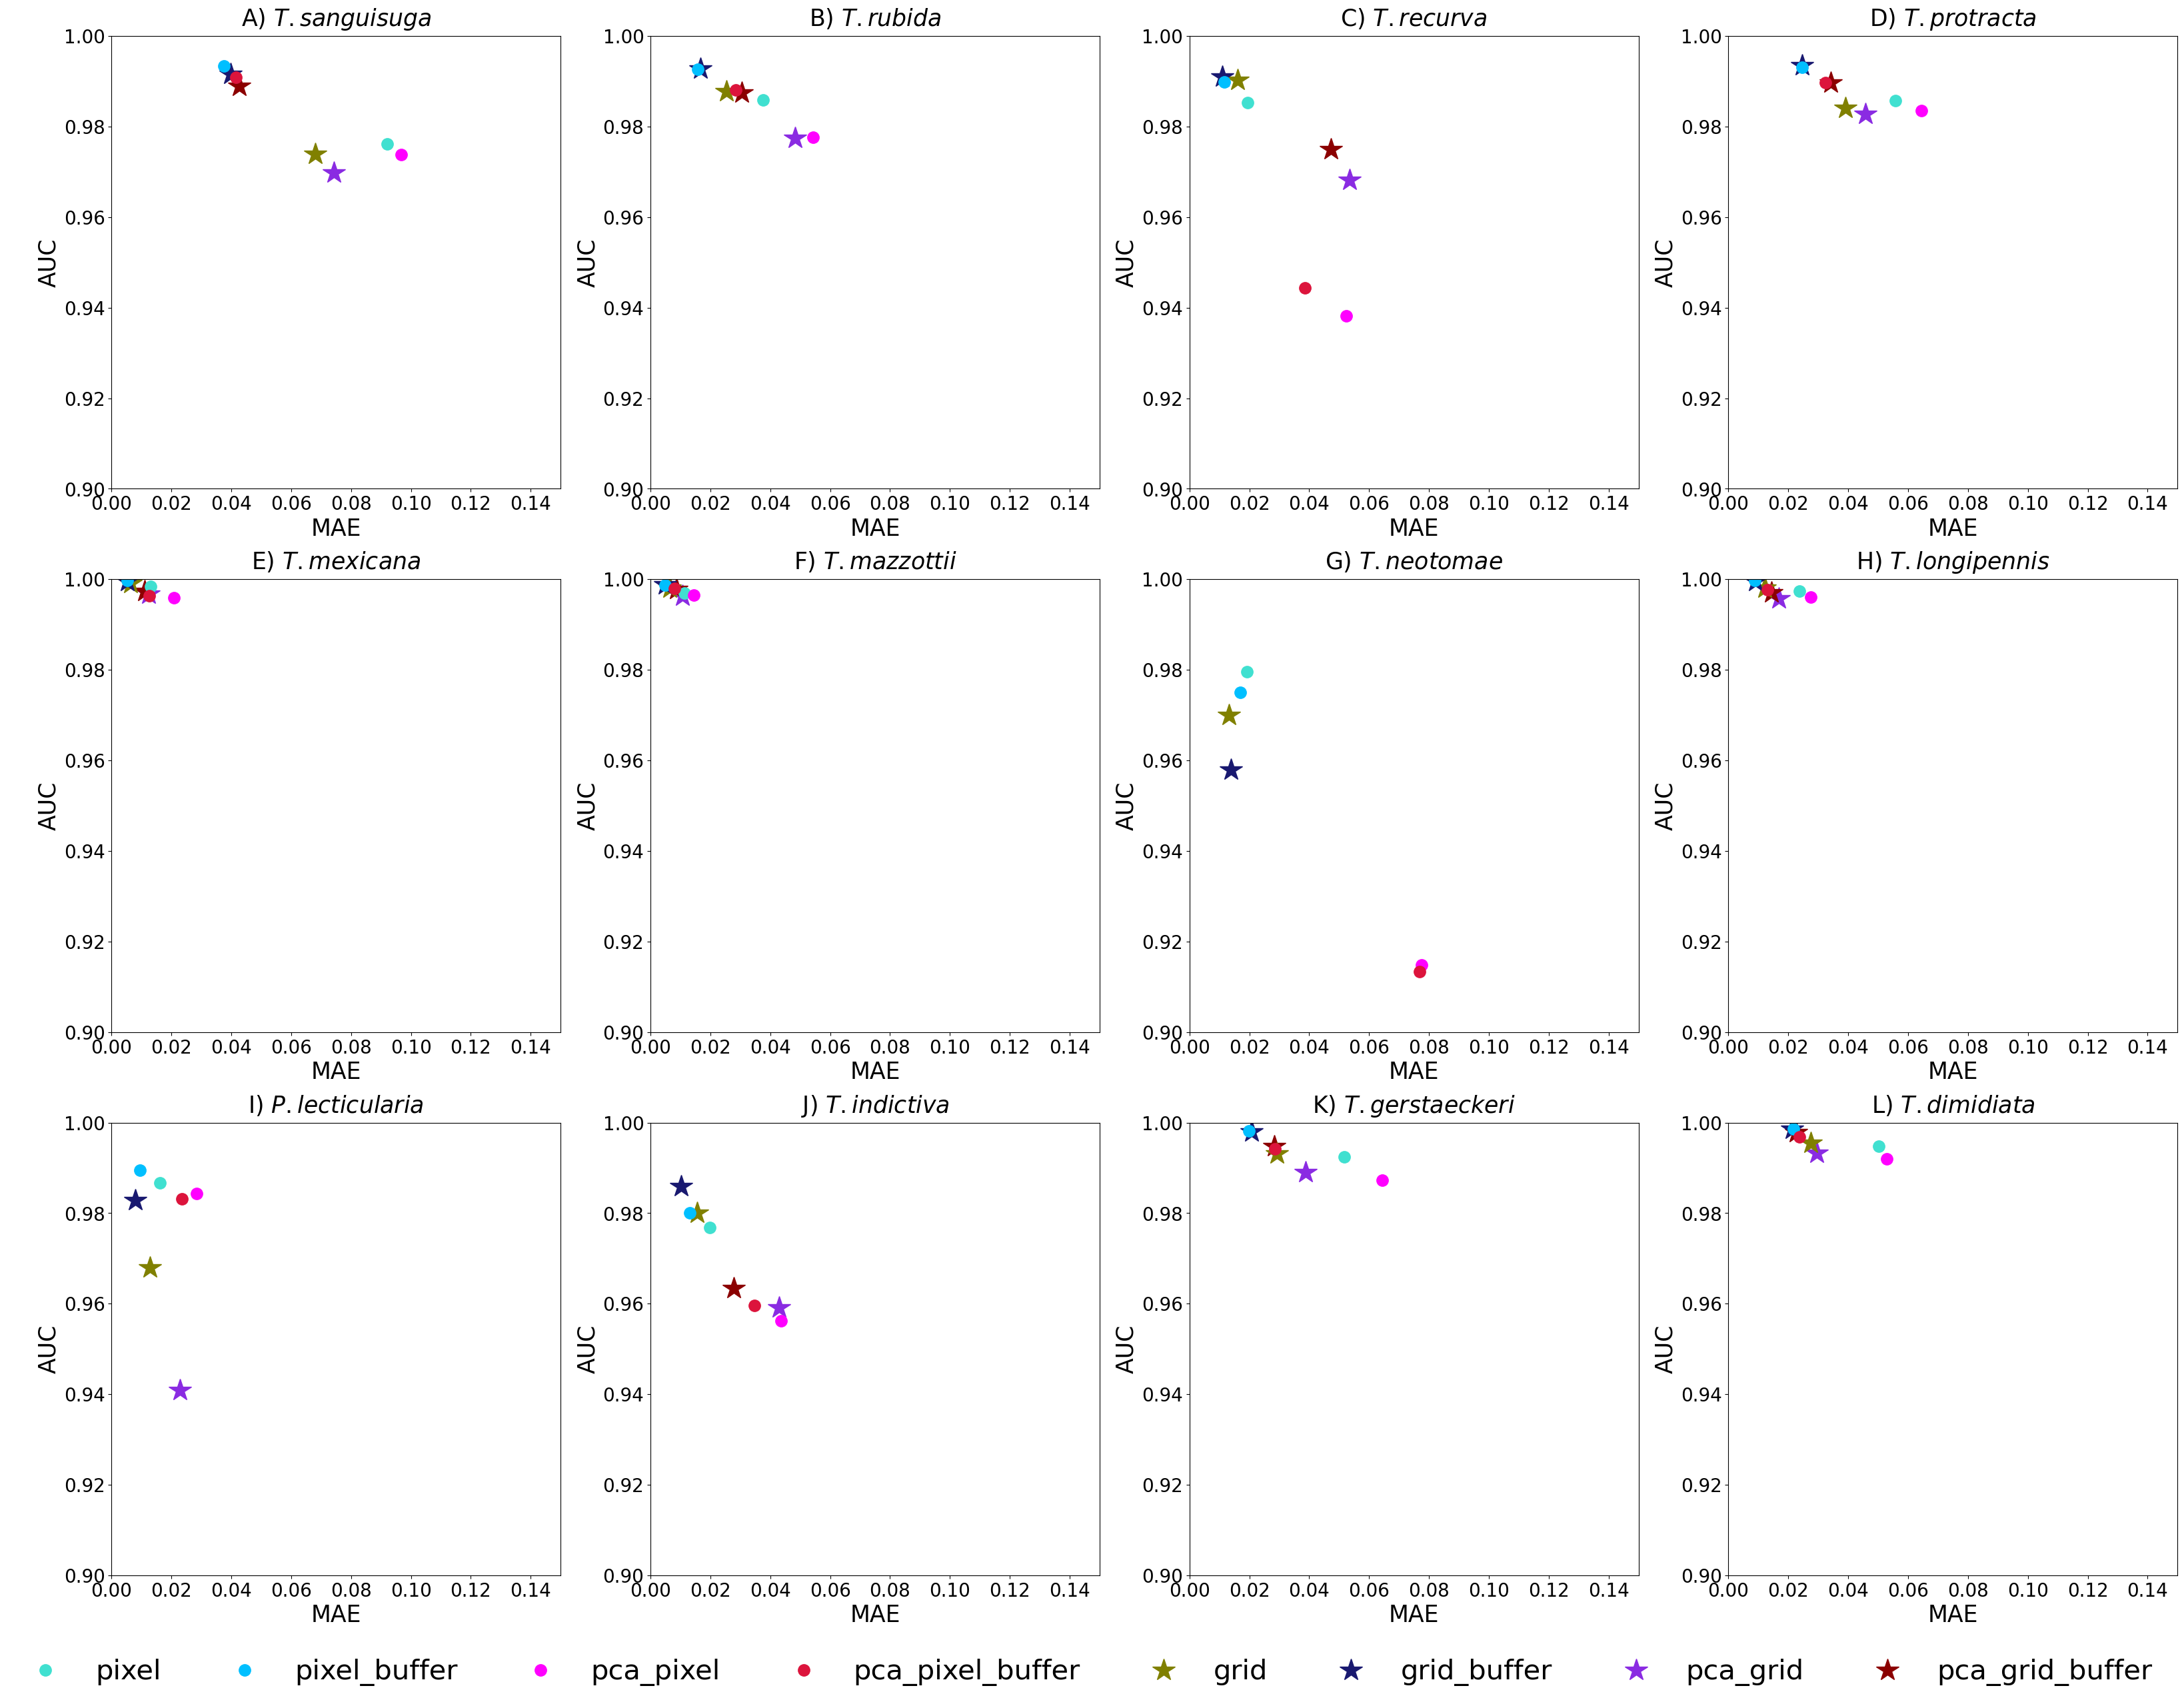

In [182]:
sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','neo','lon','lec','ind','ger','dim']
sp_rarefied_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']

plot_on_same_graph(output_dir,sp_rarefied_name_list_c,sp_rarefied_name_list_full,label_list)

In [94]:
sp_rarefied_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
#sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"
bug_data_dir = "/Users/liting/Documents/GitHub/r_chagasM/data/"
number_array = np.array([])
for i in range(len(sp_rarefied_name_list_c)):
   this_bug = sp_rarefied_name_list_c[i] 
   print(this_bug)
   sp_path = bug_data_dir+sp_rarefied_name_list_c[i]+'.csv'
   #print(sp_path)
   df = pd.read_csv(sp_path)
   number_array = np.append(number_array,int(df.shape[0]))

print(number_array)
df = pd.DataFrame({'name': sp_rarefied_name_list_c,
                   'number': number_array})
df.to_csv(output_dir+"/figures/number_all_bugs.csv")

San
Rub
Rec
Pro
Mex
Maz
Neo
Lon
Lec
Ind
Ger
Dim
[604. 158.  41. 316. 106.  69.  12. 200.  18.  34. 425. 501.]


In [142]:
sp_rarefied_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
#sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
output_csv_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/figures/evaluation results/"

bug_array = dict()


for i in range(len(sp_rarefied_name_list_c)):
   this_bug = sp_rarefied_name_list_c[i]
   this_bug_csv_path = output_csv_dir+sp_rarefied_name_list_c[i]+"-Table 1.csv" 
   print(this_bug_csv_path)
   this_bug_df = pd.read_csv(this_bug_csv_path)
   print(this_bug_df)
   bug_array[this_bug] = this_bug_df
   #corr_df = this_bug_df.drop([this_bug], axis=1)
   #print(corr_df.corr())



/Users/liting/Documents/GitHub/r_chagasM/output/figures/evaluation results/San-Table 1.csv
                San  auc_mean   auc_std  mae_mean   mae_std  bias_mean  \
0          PCA_grid  0.969893  0.005397  0.074221  0.003904  -0.035588   
1   PCA_grid_buffer  0.988984  0.002373  0.042641  0.003710  -0.004524   
2             pixel  0.976222  0.004842  0.091984  0.004766  -0.002671   
3      pixel_buffer  0.993345  0.001531  0.037446  0.003076   0.001492   
4              grid  0.973973  0.003386  0.068090  0.003580  -0.027372   
5       grid_buffer  0.991539  0.003587  0.039722  0.004463  -0.000363   
6         PCA_pixel  0.973793  0.006699  0.096677  0.005938  -0.010345   
7  PCA_pixel_buffer  0.990890  0.002156  0.041582  0.002536  -0.003985   

   bias_std  tss_mean   tss_std  tss_threshold_mean  tss_threshold_std  
0  0.002822  0.884336  0.019327            0.193298           0.013297  
1  0.003604  0.933149  0.019417            0.124235           0.007773  
2  0.003794  0.881802  

In [175]:
# for each bug, we produce correlation plot between each pair of mean values
def plot_on_same_graph(bug_array,sp_rarefied_name_list_c,sp_rarefied_name_list_full,label_list,corr_method):
    marker_size = 25
    this_fontsize = 30
    fig, ax = plt.subplots(3,4, figsize=(40,30))
    for i in range(len(sp_rarefied_name_list_c)):
        this_bug = sp_rarefied_name_list_c[i]
        bug_full_name = sp_rarefied_name_list_full[i]
        this_bug_df = bug_array[this_bug]

        corr_df = this_bug_df.drop([this_bug,"auc_std","mae_std","bias_std","tss_std","tss_threshold_mean","tss_threshold_std"], axis=1)
        coor_results = corr_df.corr(method=corr_method)
        ax_0 = i // 4
        ax_1 = i % 4

        sns.heatmap(coor_results,ax=ax[ax_0,ax_1],vmin=-1, vmax=1,cbar=False,cmap='viridis')

        
        # ax[ax_0,ax_1].set_xlim([0,0.15])
        # ax[ax_0,ax_1].set_ylim([0.9,1])
        ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%bug_full_name,fontsize=this_fontsize,y=1.01)
        ax[ax_0,ax_1].tick_params(axis='x', labelsize= this_fontsize-5 )
        ax[ax_0,ax_1].tick_params(axis='y', labelsize= this_fontsize-5 )



    plt.suptitle("Correlation Method: "+corr_method,size = this_fontsize+5)
    ax2 =fig.add_axes([0.65,0.95,0.20,0.015])
    cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', cmap='viridis')
    cb.set_label("$correlation value$", labelpad=0, size=this_fontsize)
    cb.ax.tick_params(labelsize=this_fontsize)
    plt.tight_layout() 
    #fig.subplots_adjust(wspace=0.5, hspace=0.5)
    fig.subplots_adjust(top=0.9) 
    plt.savefig(output_dir+"/figures/maxent_correlation_each_bug_"+corr_method+".png",dpi=200,bbox_inches='tight')
    

/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_47350/4226913946.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_47350/4226913946.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


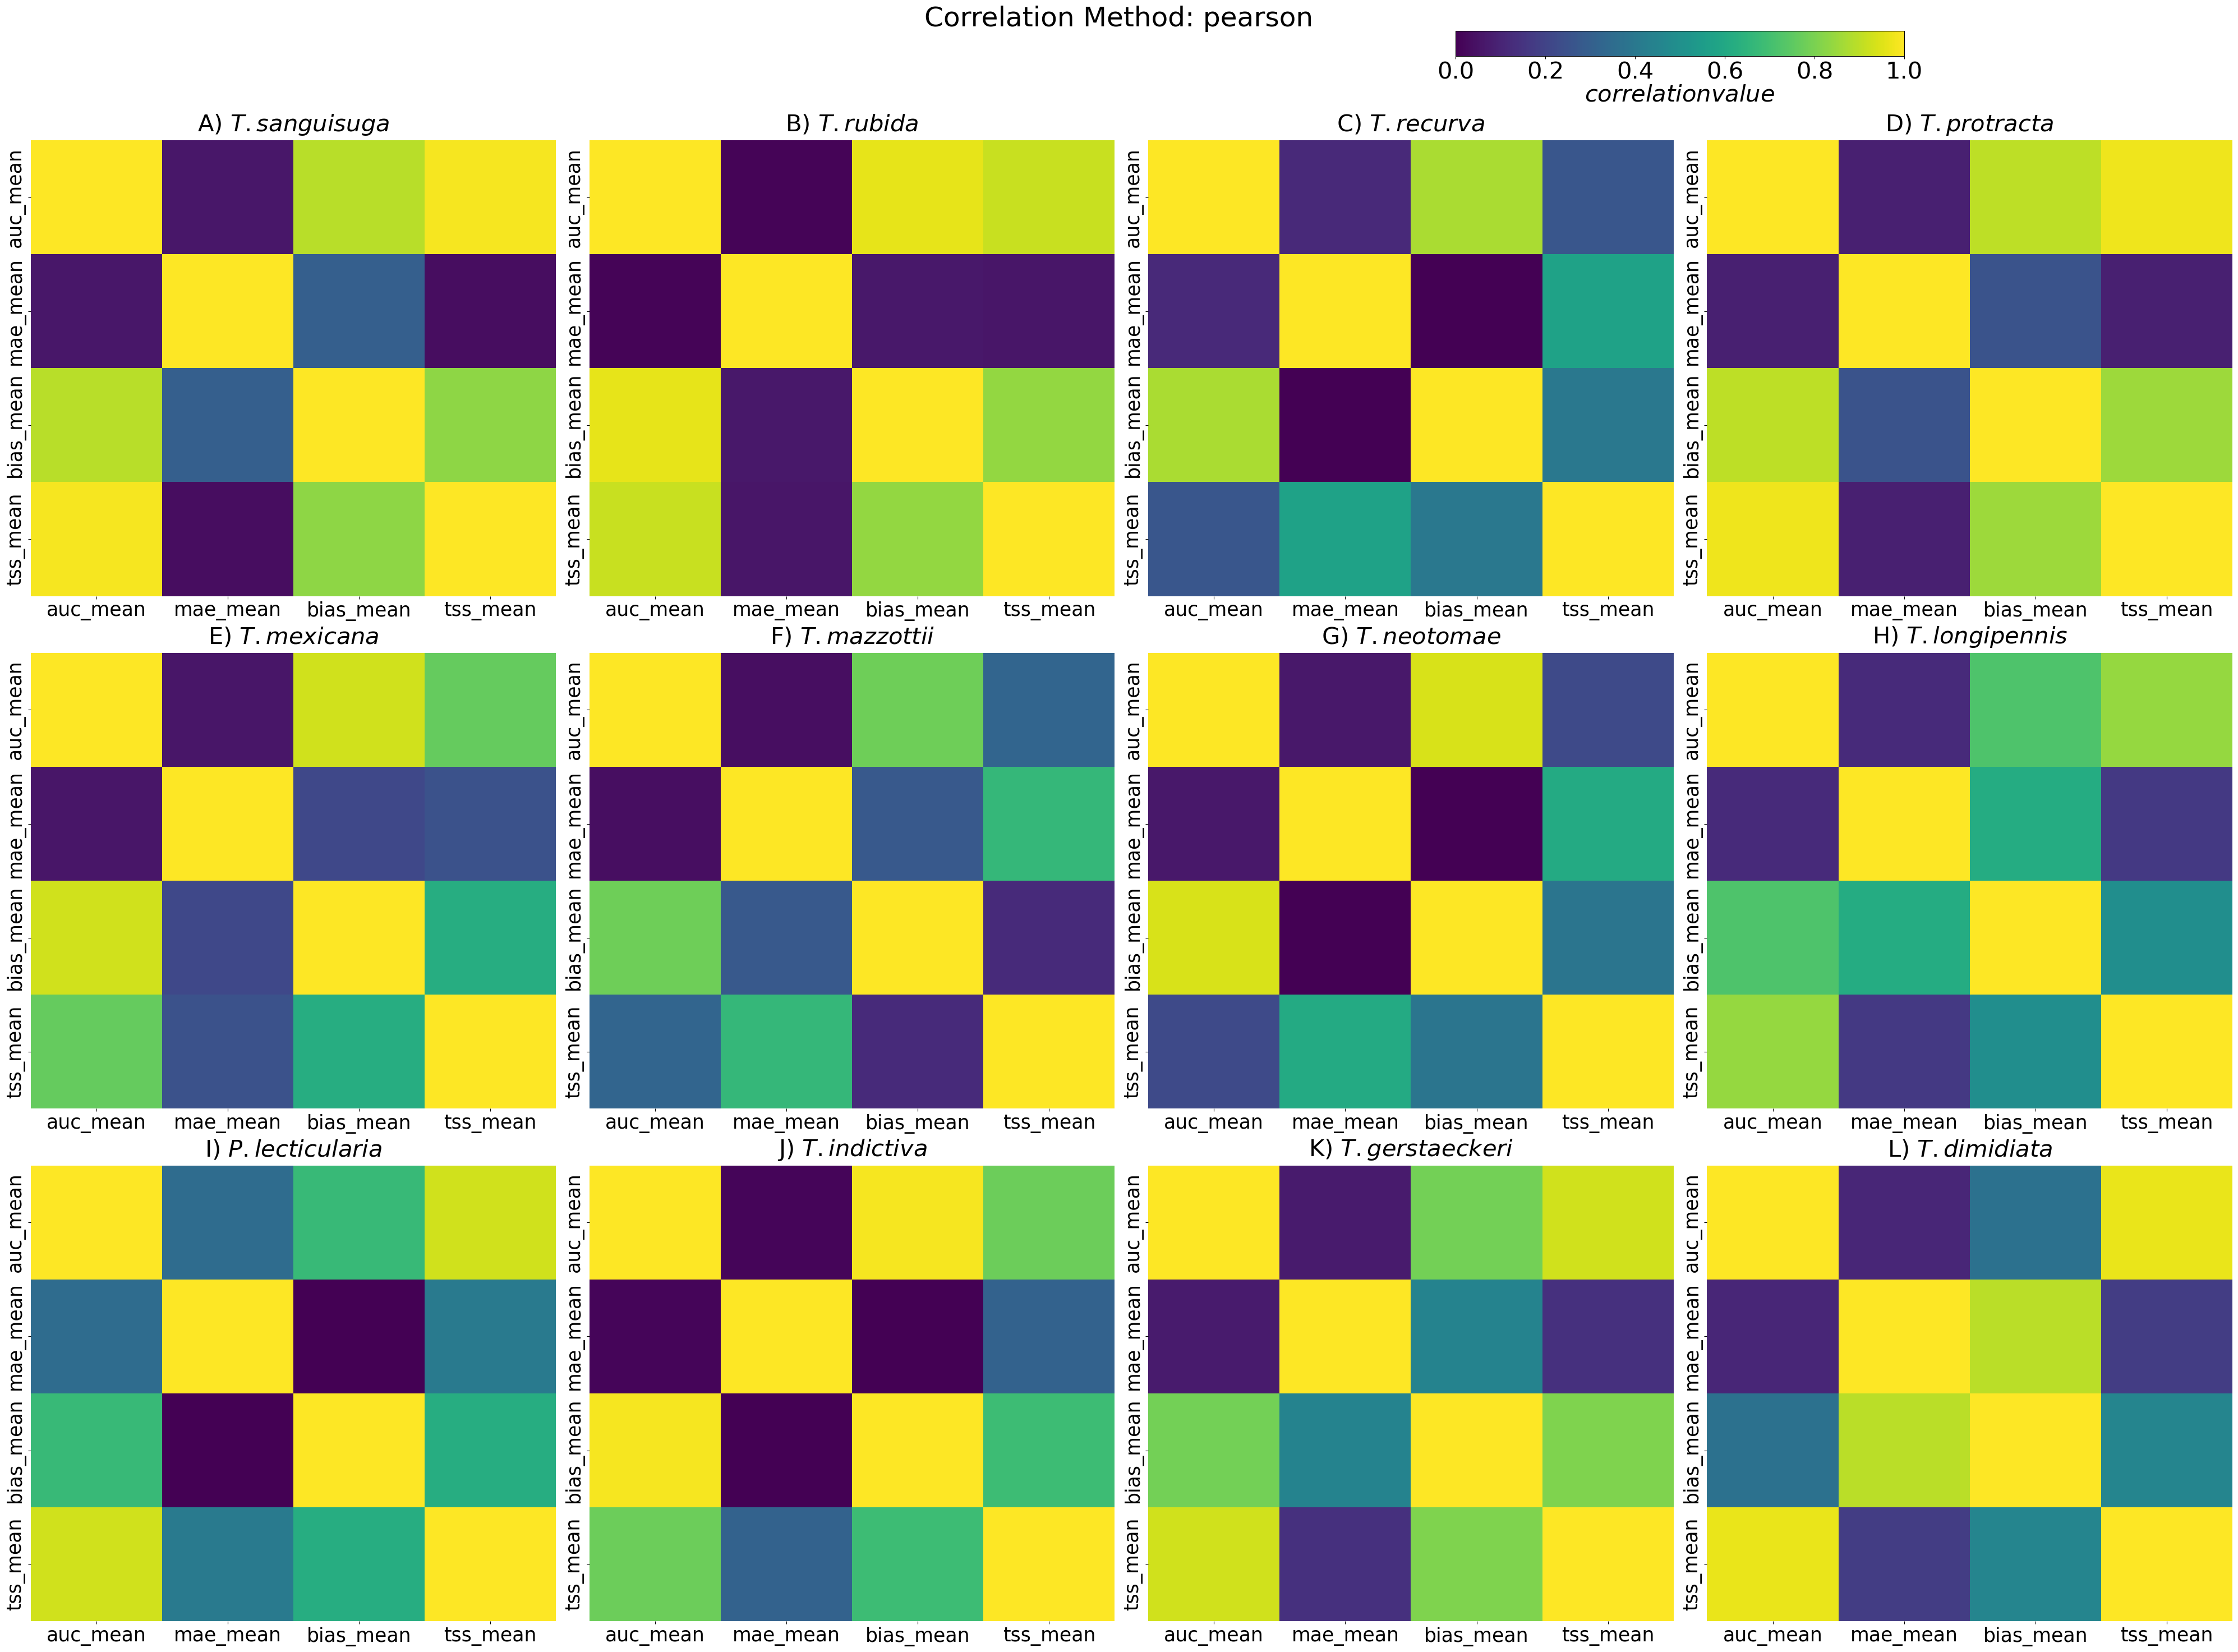

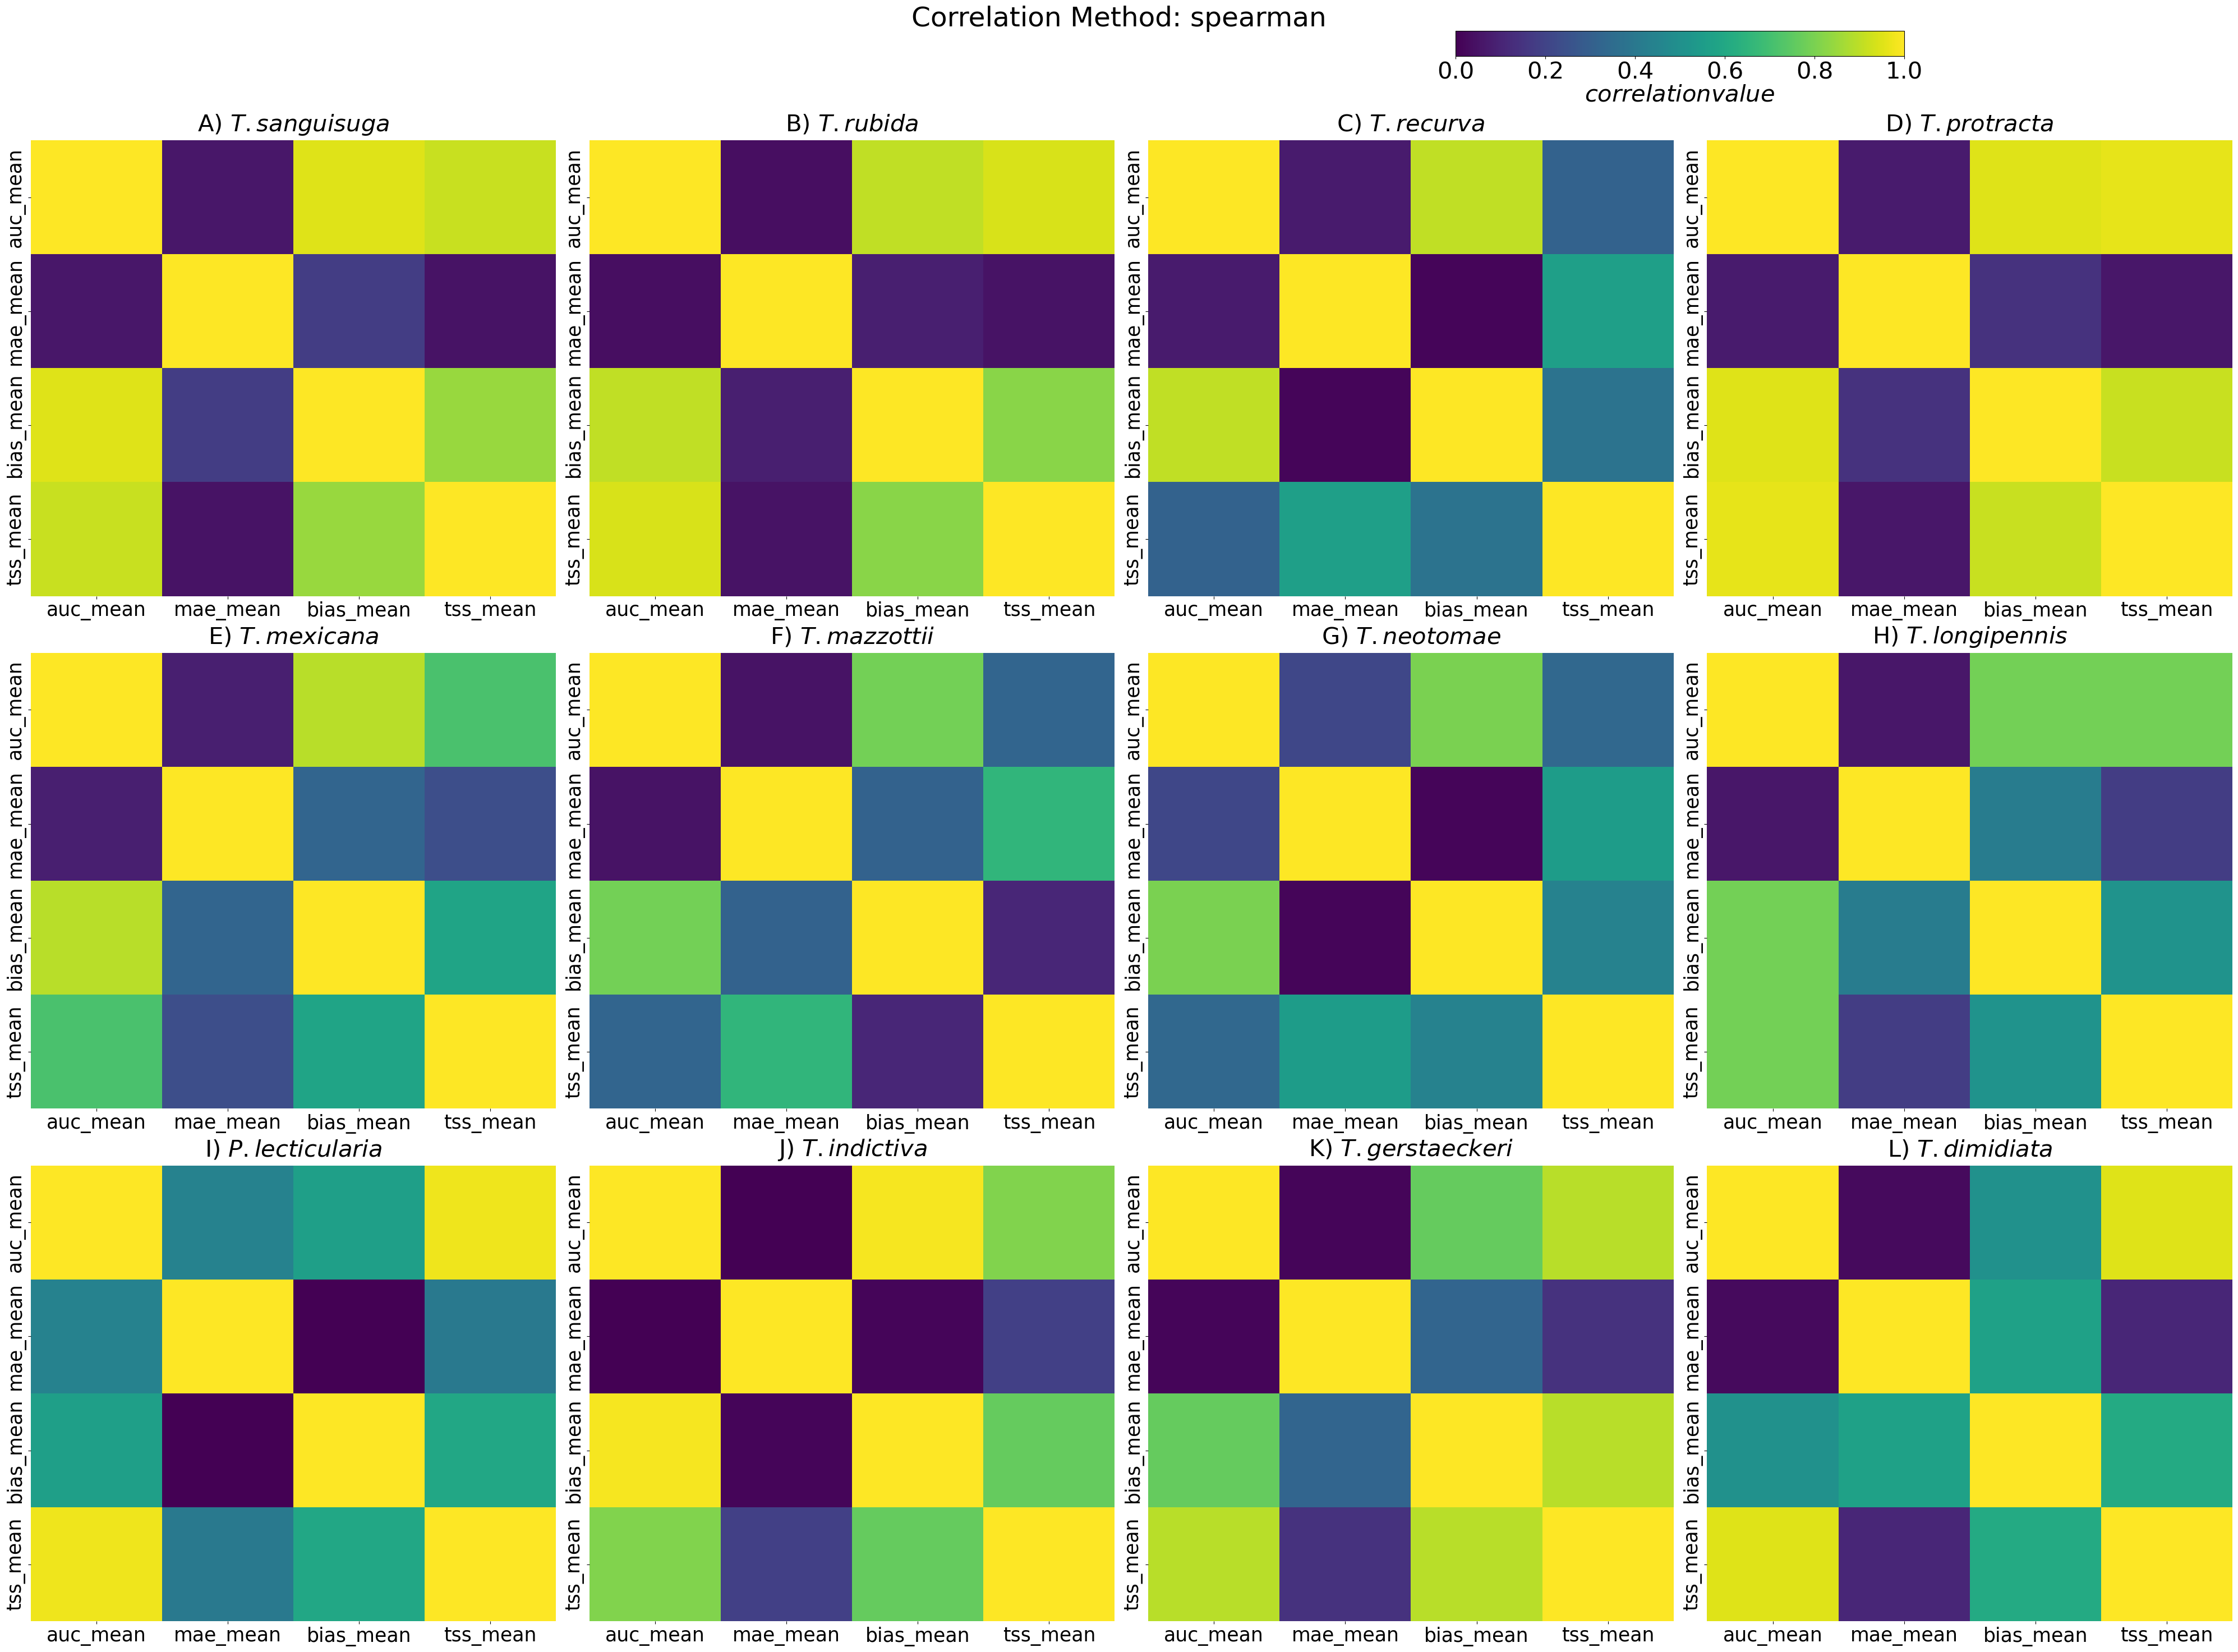

In [176]:
plot_on_same_graph(bug_array,sp_rarefied_name_list_c,sp_rarefied_name_list_full,label_list,"pearson")
plot_on_same_graph(bug_array,sp_rarefied_name_list_c,sp_rarefied_name_list_full,label_list,"spearman")
#bug_array

In [179]:
def plot_overall_corr(bug_array,sp_rarefied_name_list_c,corr_method):

        this_fontsize = 20
        this_bug = sp_rarefied_name_list_c[0]
        this_bug_df = bug_array[this_bug]
        corr_df = this_bug_df.drop([this_bug,"auc_std","mae_std","bias_std","tss_std","tss_threshold_mean","tss_threshold_std"], axis=1)
        total_df = corr_df
        this_len = len(sp_rarefied_name_list_c)
        for i in range(this_len-1):
                this_bug = sp_rarefied_name_list_c[i+1]
                this_bug_df = bug_array[this_bug]
                corr_df = this_bug_df.drop([this_bug,"auc_std","mae_std","bias_std","tss_std","tss_threshold_mean","tss_threshold_std"], axis=1)
                total_df= pd.concat([total_df, corr_df], axis=0)
        
        coor_results = total_df.corr(method=corr_method)
        print(total_df)
        fig, ax = plt.subplots(1,1, figsize=(10,10))
        sns.heatmap(coor_results,vmin=-1, vmax=1,cbar=True,cmap='viridis')
        plt.tick_params(axis='x', labelsize= this_fontsize-5 )
        plt.tick_params(axis='y', labelsize= this_fontsize-5 )
        plt.title("Correlation Method: "+corr_method,size = this_fontsize+5)
        plt.tight_layout() 
        plt.savefig(output_dir+"/figures/maxent_correlation_all_bug_"+corr_method+".png",dpi=200,bbox_inches='tight')

        

    auc_mean  mae_mean  bias_mean  tss_mean
0   0.969893  0.074221  -0.035588  0.884336
1   0.988984  0.042641  -0.004524  0.933149
2   0.976222  0.091984  -0.002671  0.881802
3   0.993345  0.037446   0.001492  0.942916
4   0.973973  0.068090  -0.027372  0.880515
..       ...       ...        ...       ...
3   0.998601  0.021376   0.012140  0.976774
4   0.995545  0.027527   0.006254  0.960436
5   0.996866  0.023701   0.008930  0.968918
6   0.998630  0.021622   0.011872  0.982132
7   0.994862  0.050214   0.025935  0.969345

[96 rows x 4 columns]
    auc_mean  mae_mean  bias_mean  tss_mean
0   0.969893  0.074221  -0.035588  0.884336
1   0.988984  0.042641  -0.004524  0.933149
2   0.976222  0.091984  -0.002671  0.881802
3   0.993345  0.037446   0.001492  0.942916
4   0.973973  0.068090  -0.027372  0.880515
..       ...       ...        ...       ...
3   0.998601  0.021376   0.012140  0.976774
4   0.995545  0.027527   0.006254  0.960436
5   0.996866  0.023701   0.008930  0.968918
6   0.998

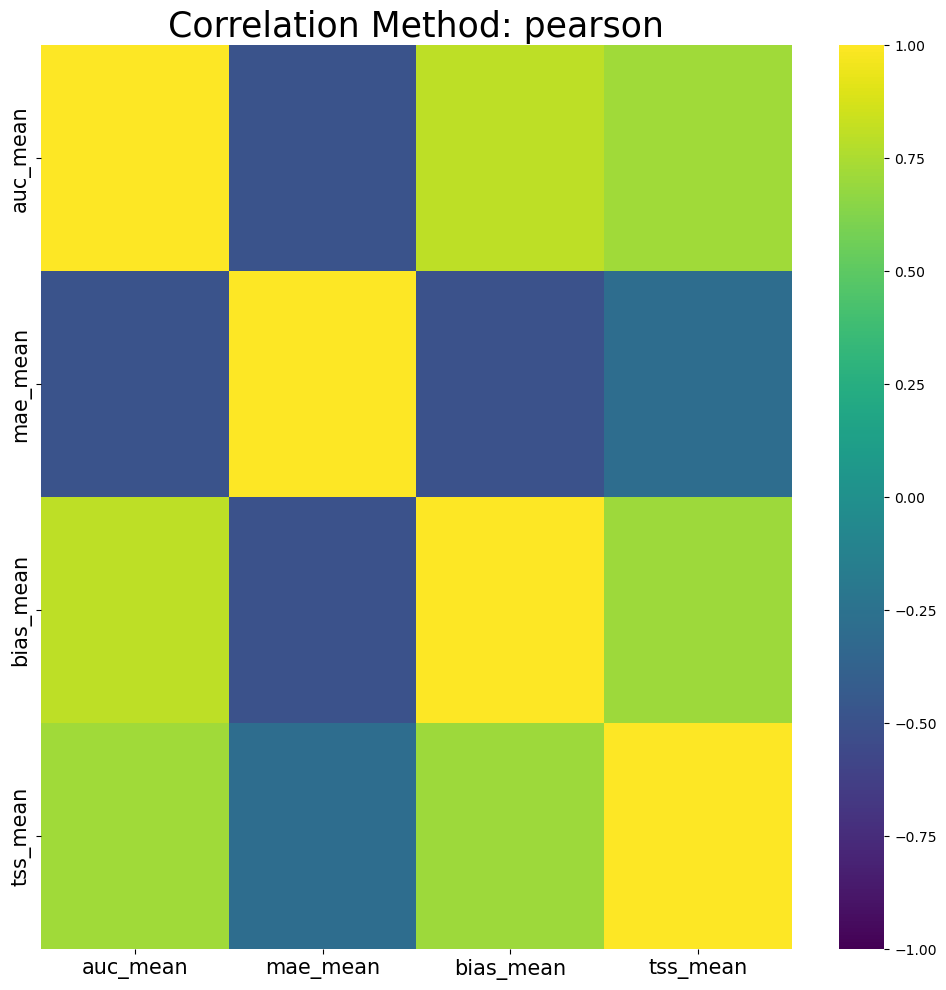

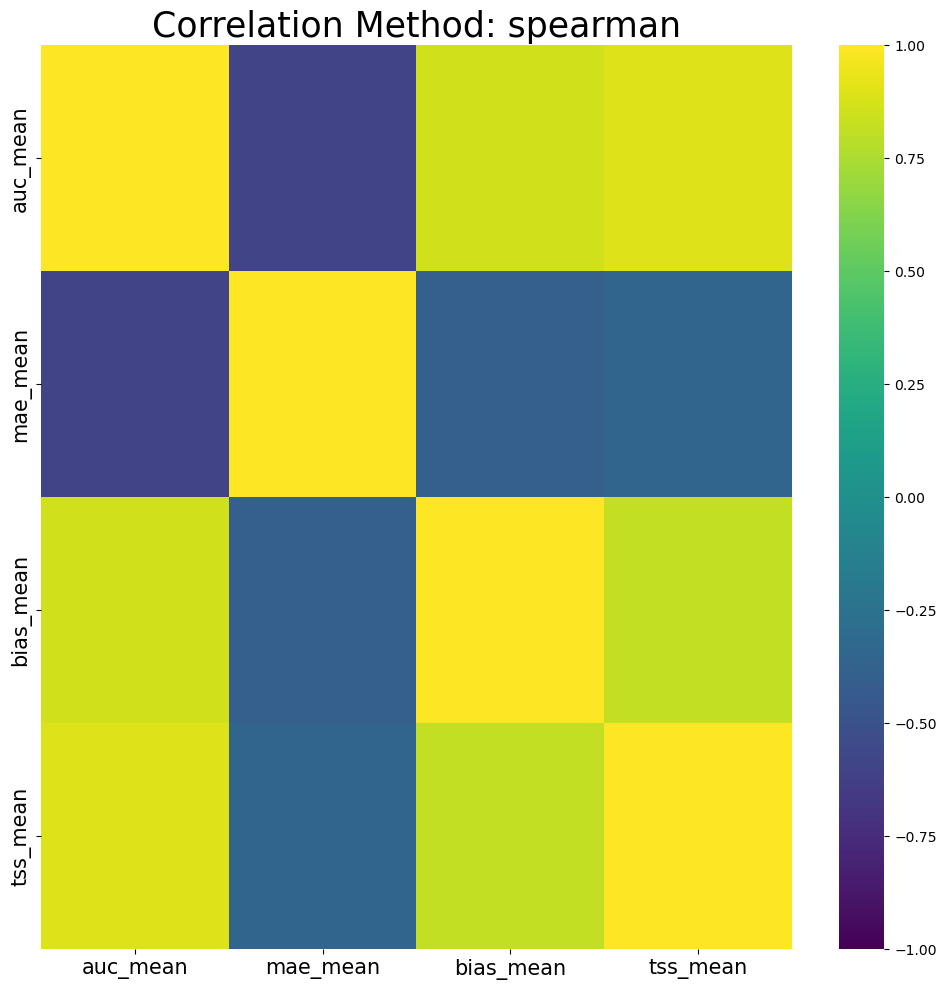

In [180]:
plot_overall_corr(bug_array,sp_rarefied_name_list_c,"pearson")
plot_overall_corr(bug_array,sp_rarefied_name_list_c,"spearman")